In [6]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


In [7]:
# import mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

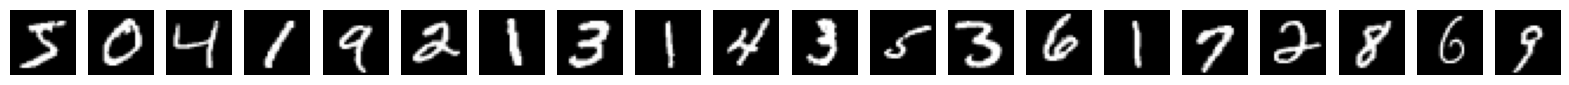

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
noise_factor = 1 * 10**(-20)
"""
X_train_noisy_img = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
X_test_noisy_img = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

X_train_noisy_img = X_train_noisy_img.reshape((len(x_train), -1))
X_test_noisy_img = X_test_noisy_img.reshape((len(x_test), -1))"""

x_train_flat = x_train.reshape((len(x_train), -1))  
x_test_flat = x_test.reshape((len(x_test), -1))

plt.figure(figsize=(20, 4))  # Adjust the size as needed

for i in range(20):
    # Original image
    plt.subplot(2, 20, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

"""    # Reconstructed image
    plt.subplot(2, 20, i+21)
    plt.imshow(X_train_noisy_img[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
"""
plt.show()

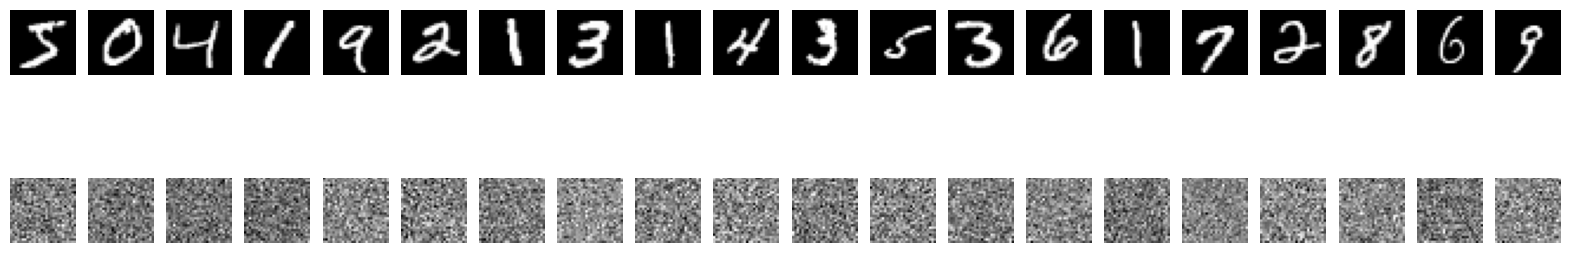

In [12]:
autoencoder = tf.keras.Sequential()
autoencoder.add(tf.keras.layers.Input(shape=(784,)))
autoencoder.add(tf.keras.layers.Dense(256, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(64, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(16, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(64, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(256, activation='relu'))
autoencoder.add(tf.keras.layers.Dense(784, activation='sigmoid'))  # Corrected line

In [10]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train_flat, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=( x_test_flat, x_test))

NameError: name 'X_train_noisy_img' is not defined

In [148]:
x_predictions = autoencoder.predict(X_test_noisy_img)

313/313 [==============================] - 0s 659us/step


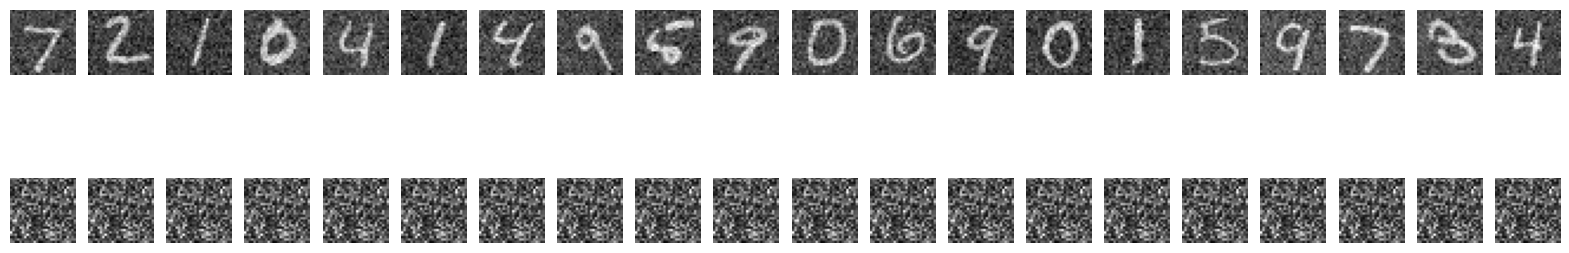

In [149]:
plt.figure(figsize=(20, 4))  # Adjust the size as needed

for i in range(20):
    # Original image
    plt.subplot(2, 20, i+1)
    plt.imshow(X_test_noisy_img[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 20, i+21)
    plt.imshow(x_predictions[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    

plt.show()

Mean Squared Error: 1.245833037427646e-11


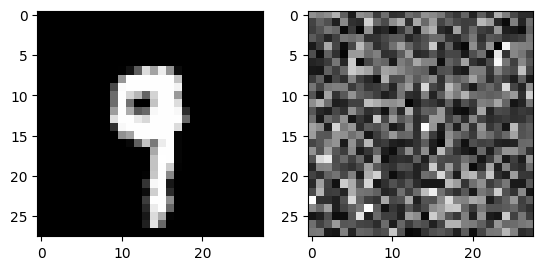

In [150]:
from sklearn.metrics import mean_squared_error
random_index = np.random.randint(len(x_test))
plt.subplot(1, 2, 1)
plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(x_predictions[random_index].reshape(28, 28), cmap='gray')
error = mean_squared_error(x_test[random_index], x_predictions[random_index])
print(f"Mean Squared Error: {error}")


313/313 [==============================] - 0s 688us/step
Mean Squared Error: 1.245833037427646e-11


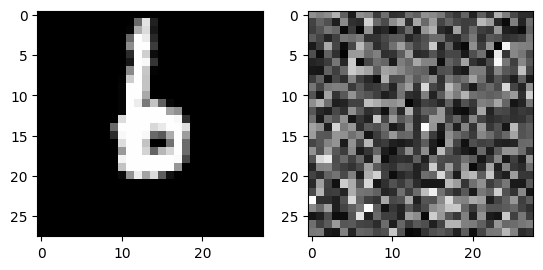

In [156]:
#flip the image and check the reconstruction
x_test_flipped = np.flip(x_test, axis=1)
x_predictions_flipped = autoencoder.predict(x_test_flipped)
plt.subplot(1, 2, 1)
plt.imshow(x_test_flipped[random_index].reshape(28, 28), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(x_predictions_flipped[random_index].reshape(28, 28), cmap='gray')
error = mean_squared_error(x_test[random_index], x_predictions[random_index])
print(f"Mean Squared Error: {error}")

The reconstruction Errors are Equal for both the original and flipped images.

The image output is significanly better then the input image which was missing the full loop